<a href="https://colab.research.google.com/github/kahumawalter/Project-2/blob/main/Project_2_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = '/content/drive/MyDrive/Coding Dojo/Week 7/Diamonds Prices2022.csv'

df = pd.read_csv(path)
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


There are 53,940 diamonds in the dataset with 10 features (carat, cut, color, clarity, depth, table, price, x, y, and z). Most variables are numeric in nature, but the variables cut, color, and clarity are ordered factor variables with the following levels.
About the currency for the price column: it is Price ($)
And About the columns x,y, and z they are diamond measurements as (( x: length in mm, y: width in mm,z: depth in mm ))

In [2]:
# The unnamed column is unnecessary so I decided to drop it.

diamond_df = df.drop(columns=['Unnamed: 0'])
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
#Checking to see if there any difficult values
diamond_df.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
#The data has no missing values. 
diamond_df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
# Assigning the y (target) and X (features)
y = diamond_df['price']
X = diamond_df.drop(columns= 'price')

In [7]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


For this part of the project, you will continue your EDA by 
Identifying any moderate or strong correlations between your target and your features and/or between one feature and another
Creating multivariate exploratory visuals to further understand your data

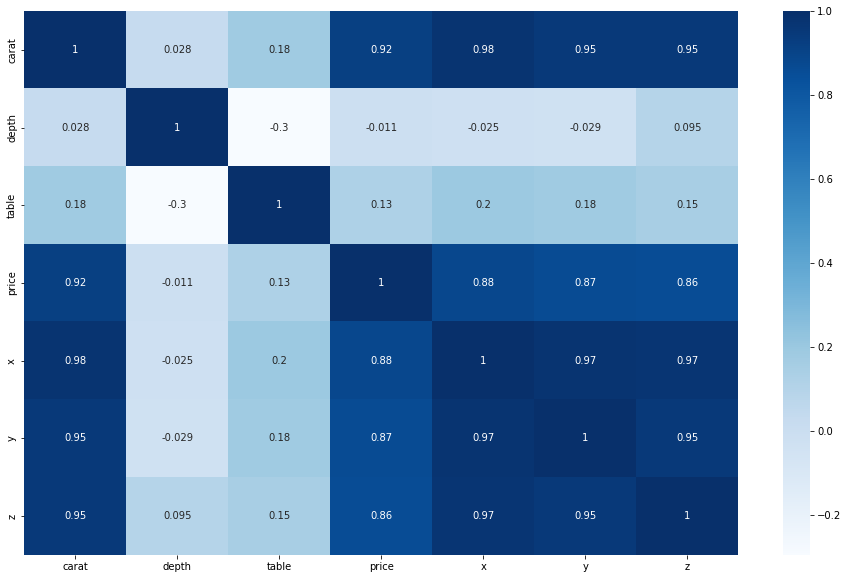

In [8]:
#Heatmap of the correlation between features and target.

corr = diamond_df.corr()

import seaborn as sns
plt.figure(figsize=(16,10))
sns.heatmap(corr, cmap = 'Blues',annot=True);


There is a strong correlation between my target 'Price' and features like carat, x,y and z. This explains that these play a big factor in the price evaluation. 

There is also a strong correlation between features like carat, x, y and z meaning that these tend to go hand in hand. 

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [10]:
#From your data analysis, create two visuals that demonstrate key findings of interest to a stakeholder. 

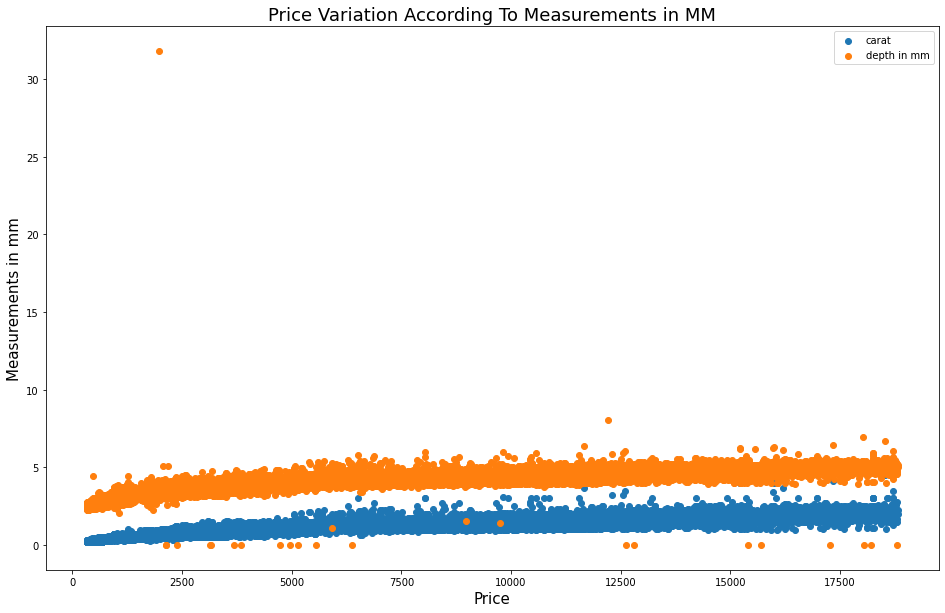

In [11]:
# Visualizing a scatter plot

plt.figure(figsize=(16,10))
plt.scatter(y,diamond_df['carat'], label='carat')
plt.scatter(y,diamond_df['z'], label='depth in mm')
plt.xlabel('Price',fontsize = 15)
plt.ylabel('Measurements in mm', fontsize = 15)
plt.legend()
plt.title('Price Variation According To Measurements in MM', fontsize = 18);


The scattered plot above shows that the more carats and the depth of the diamond the more expensive it will be. However there are also some instances when the depth of the diamond didn't have a big impact on the price because the carats were low. 

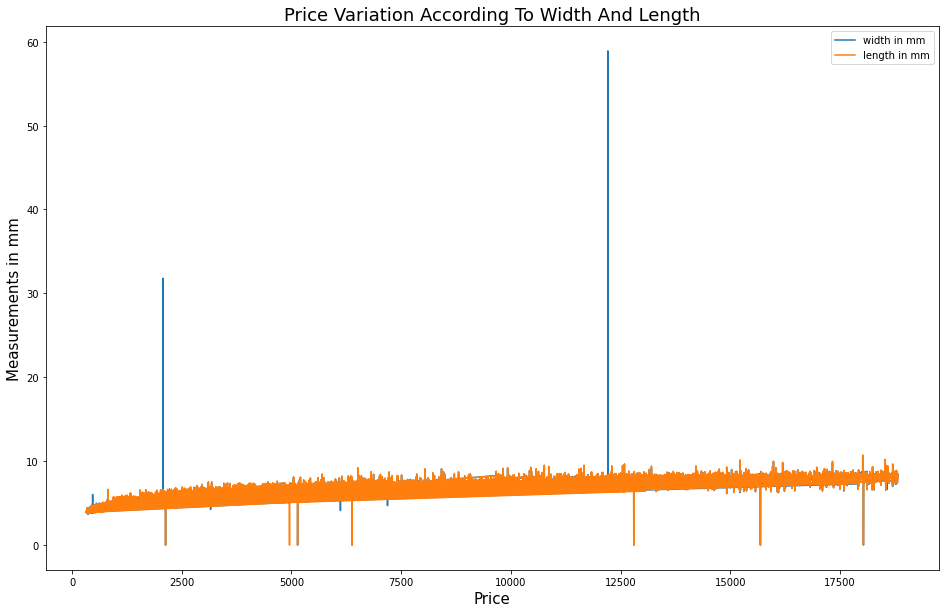

In [16]:
#visualizing a line plot 

plt.figure(figsize=(16,10))
plt.plot(y,diamond_df['y'], label='width in mm')
plt.plot(y,diamond_df['x'], label='length in mm')
plt.xlabel('Price',fontsize = 15)
plt.ylabel('Measurements in mm', fontsize = 15)
plt.legend()
plt.title('Price Variation According To Width And Length', fontsize = 18);

The above line plot shows us that the more width and length the more expensive the diamond will be. However there some outliers when the diamond was more 30mm wide (which is the widest) but it didn't reflect the same on the price. There are outliers when the length was 0 but the diamond price was still high forexample at 18,000 USD. 